Firstly,import all the libraries you required for EDA
* pandas you need for data reading and evaluating
* numpy for basic mathematical operations
* matplotlib and seaborn are visualization libraries.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read titanic_train.csv data file

In [97]:
titanic=pd.read_csv(r"C:\Users\DELL\Downloads\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis
step 1: Finding missing data

In [98]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

step 2: we can use seaborn heatmap for finding missing values by visualization technique

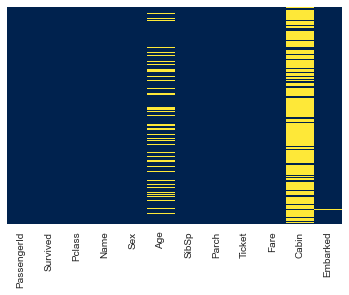

In [99]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap= 'cividis')
plt.show()

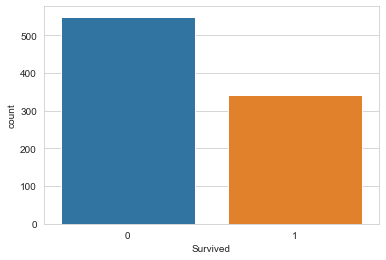

In [56]:
#step 3: Handling nan values
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=titanic)
plt.show()

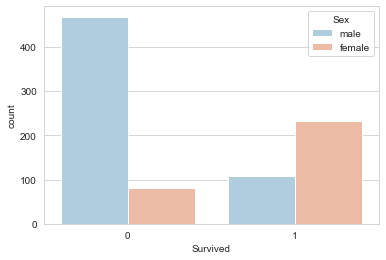

In [22]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=titanic,palette="RdBu_r")
plt.show()

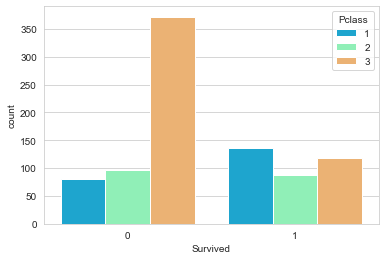

In [24]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=titanic,palette="rainbow")
plt.show()

<AxesSubplot:xlabel='Age'>

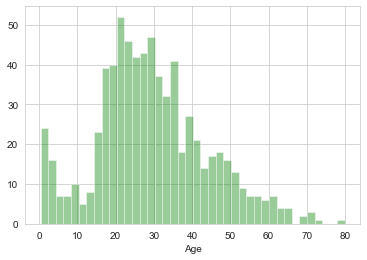

In [32]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='green',bins=40)

<AxesSubplot:>

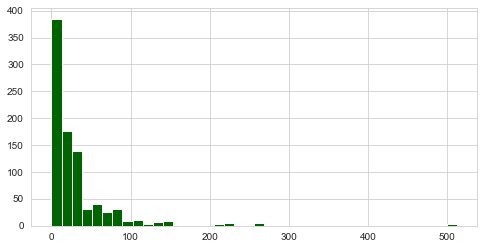

In [36]:
titanic['Fare'].hist(color='darkgreen',bins=40,figsize=(8,4))

## Data Cleaning
We want to fill the missing age data instead of just dropping the missing age data rows.
step 1: filling the maen age of the passengers(imputation).
    
step 2: However, we can just the check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

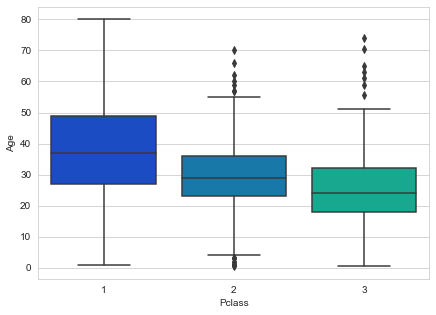

In [42]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Pclass",y="Age",data=titanic,palette="winter")

from above plot, we can see the middle line of each boxes are representing median.

 So, as Pclass-1 have average age of 37,
 Pclass-2 have average age of 29,
 Pclass-3 have average age of 24.
 
We will fill the nan values of ages with average age value for corresponding Pclass.

In [100]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24    
    else:
        return Age

In [101]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [102]:
titanic=titanic.dropna()
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [104]:
titanic.drop('Cabin',axis=1,inplace=True)

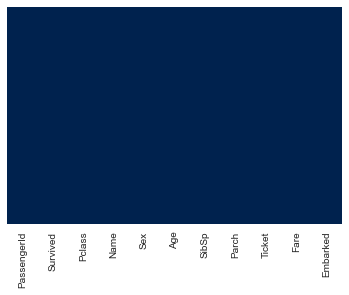

In [105]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap= 'cividis')
plt.show()

## Converting Categorical Features

In [106]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 18.9+ KB


create dummies to covert categorical data to numerial,which is easy to analyze.

In [107]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [108]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [ ]:
titanic.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [116]:
titanic.drop(['Name'],axis=1,inplace=True)

In [111]:
titanic=pd.concat([titanic,sex,embark],axis=1)

In [118]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


## Building a Logistic Regression Model

### Train Test Split

In [119]:
titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,38.0,1,0,71.2833,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1
6,7,1,54.0,0,0,51.8625,1,0,1
10,11,3,4.0,1,1,16.7000,0,0,1
11,12,1,58.0,0,0,26.5500,0,0,1


In [121]:
titanic['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),
                                                   titanic['Survived'],test_size=0.30,
                                                   random_state=101)

### Training and Predicting

In [127]:
from sklearn.linear_model import LogisticRegression

In [131]:
logmodel = LogisticRegression()


In [1]:
logmodel.fit(X_train,y_train)

NameError: name 'logmodel' is not defined